# Buliding CNN model for classification of Malaria Infected Red Blood Cells. 

**The code contains the following aspects:**
1. Data Labeling
2. Data Preprocessing (Image Agumentation)
3. Creating train/test datasets
4. Implementation of CNN model
5. Prediction
6. Analysing the prediction using confusion matrix

# Packages Used

In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
from mlxtend.plotting import plot_confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Activation
from keras import backend as K
from keras import optimizers
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Loading Dataset

In [ ]:
!mkdir -p ~/.kaggle

# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

uploaded = files.upload()

In [3]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria
!ls

In [ ]:
!unzip cell-images-for-detecting-malaria.zip
!ls

# Data Preprocessing

In [6]:
print(os.listdir("./cell_images/cell_images"))

['Uninfected', 'Parasitized']


In [7]:
infected = os.listdir('./cell_images/cell_images/Parasitized/') 
uninfected = os.listdir('./cell_images/cell_images/Uninfected/')

In [ ]:
data = []
labels = []
data_rotate = []
labels_rotate = []
data_blur = []
labels_blur = []

for i in infected:
    try:
    
        image = cv2.imread("./cell_images/cell_images/Parasitized/"+i)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((50 , 50)) #image resizing
        rotated120 = resize_img.rotate(120) #rotation
        blur = cv2.blur(np.array(resize_img) ,(10,10)) #bluring
        data.append(np.array(resize_img))
        data_rotate.append(np.array(rotated120))
        data_blur.append(np.array(blur))
        label = to_categorical(1, num_classes=2) 
        labels.append(label)
        label_rotate = to_categorical(1, num_classes=2) 
        labels_rotate.append(label_rotate)
        label_blur = to_categorical(1, num_classes=2) 
        labels_blur.append(label_blur)
        
        
        
    except AttributeError:
        print('')
    
for u in uninfected:
    try:
        
        image = cv2.imread("./cell_images/cell_images/Uninfected/"+u)
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((50 , 50)) #image resizing
        rotated120 = resize_img.rotate(120) #rotation
        blur = cv2.blur(np.array(resize_img) ,(10,10)) #bluring
        data.append(np.array(resize_img))
        data_rotate.append(np.array(rotated120))
        data_blur.append(np.array(blur)) 
        label = to_categorical(0, num_classes=2) 
        labels.append(label)
        label_rotate = to_categorical(0, num_classes=2) 
        labels_rotate.append(label_rotate)
        label_blur = to_categorical(0, num_classes=2) 
        labels_blur.append(label_blur)
        
    except AttributeError:
        print('')

data = np.array(data)
data_rotate = np.array(data_rotate)
data_blur = np.array(data_blur)
labels = np.array(labels)
labels_rotate = np.array(labels_rotate)
labels_blur = np.array(labels_blur)


np.save('Data' , data)
np.save('Labels' , labels)
np.save('Data_Rotate' , data_rotate)
np.save('Labels_Rotate' , labels_rotate)
np.save('Data_Blur' , data_blur)
np.save('Labels_Blur' , labels_blur)

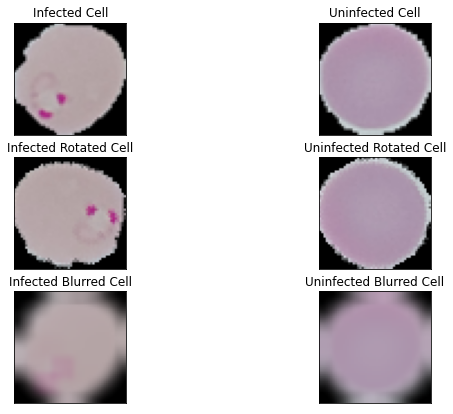

In [9]:
plt.figure(3, figsize = (10 , 7))
plt.subplot(3 , 2 , 1)
plt.imshow(data[10])
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(3 , 2 , 2)
plt.imshow(data[15000])
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(3 , 2 , 3)
plt.imshow(data_rotate[10])
plt.title('Infected Rotated Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(3 , 2 , 4)
plt.imshow(data_rotate[15000])
plt.title('Uninfected Rotated Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(3 , 2 , 5)
plt.imshow(data_blur[10])
plt.title('Infected Blurred Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(3 , 2 , 6)
plt.imshow(data_blur[15000])
plt.title('Uninfected Blurred Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

In [10]:
n = np.arange(data.shape[0]) #shuffle images
np.random.shuffle(n)
data = data[n]
labels = labels[n]

np.random.shuffle(n)
data_rotate = data_rotate[n]
labels_rotate = labels_rotate[n]

np.random.shuffle(n)
data_blur = data_blur[n]
labels_blur = labels_blur[n]

In [11]:
data = data.astype(np.float32)
labels = labels.astype(np.int32)
data = data/255 #reduce weight

data_rotate = data_rotate.astype(np.float32)
labels_rotate = labels_rotate.astype(np.int32)
data_rotate = data_rotate/255

data_blur = data_blur.astype(np.float32)
labels_blur = labels_blur.astype(np.int32)
data_blur = data_blur/255

In [12]:
X = np.append(data, data_rotate, axis=0)
X = np.append(X, data_blur, axis=0)

Y = np.append(labels, labels_rotate, axis=0)
Y = np.append(Y, labels_blur, axis=0)

In [13]:
n = np.arange(X.shape[0]) #shuffle images
np.random.shuffle(n)
X = X[n]
Y = Y[n]

In [14]:
print('Cells : {} | Labels : {}'.format(X.shape , Y.shape))

Cells : (82674, 50, 50, 3) | Labels : (82674, 2)


# Train Test Split


In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [16]:
print(f'SHAPE OF TRAINING IMAGE DATA : {x_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {x_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (57871, 50, 50, 3)
SHAPE OF TESTING IMAGE DATA : (24803, 50, 50, 3)
SHAPE OF TRAINING LABELS : (57871, 2)
SHAPE OF TESTING LABELS : (24803, 2)


# CNN Model

**Building CNN Layers**

In [17]:
def CNNbuild(height, width, classes, channels):
    model = Sequential()
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(128, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model

In [18]:
model = CNNbuild(height = 50, width = 50, classes = 2, channels = 3)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0

In [19]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

# Model Implementation and Evaluation

In [ ]:
fitting = model.fit(x_train, y_train, epochs = 20, batch_size = 256)

In [ ]:
predictions = model.evaluate(x_test, y_test)

In [22]:
pred_label = model.predict(x_test)

In [23]:
pred_label = np.argmax(pred_label, axis=-1)
true_label = np.argmax(y_test, axis = -1)

print(pred_label)
print(true_label)

[1 1 0 ... 0 1 1]
[1 1 0 ... 0 1 1]


In [24]:
print(classification_report(true_label , pred_label))
print(f'Loss : {predictions[0]}')
print(f'Accuracy : {predictions[1]}')

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     12451
           1       0.96      0.94      0.95     12352

    accuracy                           0.95     24803
   macro avg       0.95      0.95      0.95     24803
weighted avg       0.95      0.95      0.95     24803

Loss : 0.14709655940532684
Accuracy : 0.9460145831108093


<Figure size 432x288 with 0 Axes>

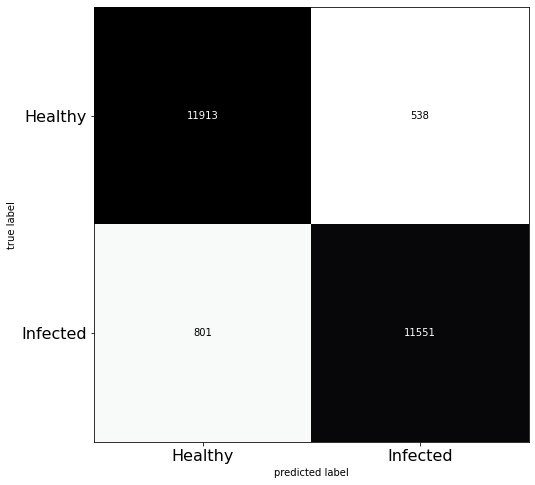

In [25]:
conf_matrix=confusion_matrix(true_label , pred_label)
plt.figure()
plot_confusion_matrix(conf_matrix, figsize=(12,8), hide_ticks=True, cmap=plt.cm.bone_r)
plt.xticks(range(2), ['Healthy', 'Infected'], fontsize=16)
plt.yticks(range(2), ['Healthy', 'Infected'], fontsize=16)
plt.show()